<a href="https://colab.research.google.com/github/venkiharvgit/csci-e-599a-2024-cybersecurity/blob/main/zscore/exploratory8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
import random

import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


import dask.dataframe as dd
import socket
import struct
import random
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq
import pickle
from scipy.stats import normaltest

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
zepa = '/content/gdrive/MyDrive/NF_ToN_IoT_v2_full170chunks'
os.chdir(zepa)
parquet_files = [filename for filename in os.listdir(zepa) if filename.endswith('.parquet')]
parquet_files = parquet_files[:-1]
print(parquet_files)
print(len(parquet_files))

['NF-ToN-IoT-v2_CH_0.parquet', 'NF-ToN-IoT-v2_CH_1.parquet', 'NF-ToN-IoT-v2_CH_2.parquet', 'NF-ToN-IoT-v2_CH_3.parquet', 'NF-ToN-IoT-v2_CH_4.parquet', 'NF-ToN-IoT-v2_CH_5.parquet', 'NF-ToN-IoT-v2_CH_6.parquet', 'NF-ToN-IoT-v2_CH_7.parquet', 'NF-ToN-IoT-v2_CH_8.parquet', 'NF-ToN-IoT-v2_CH_9.parquet', 'NF-ToN-IoT-v2_CH_10.parquet', 'NF-ToN-IoT-v2_CH_11.parquet', 'NF-ToN-IoT-v2_CH_12.parquet', 'NF-ToN-IoT-v2_CH_13.parquet', 'NF-ToN-IoT-v2_CH_14.parquet', 'NF-ToN-IoT-v2_CH_15.parquet', 'NF-ToN-IoT-v2_CH_16.parquet', 'NF-ToN-IoT-v2_CH_17.parquet', 'NF-ToN-IoT-v2_CH_18.parquet', 'NF-ToN-IoT-v2_CH_19.parquet', 'NF-ToN-IoT-v2_CH_20.parquet', 'NF-ToN-IoT-v2_CH_21.parquet', 'NF-ToN-IoT-v2_CH_22.parquet', 'NF-ToN-IoT-v2_CH_23.parquet', 'NF-ToN-IoT-v2_CH_24.parquet', 'NF-ToN-IoT-v2_CH_25.parquet', 'NF-ToN-IoT-v2_CH_26.parquet', 'NF-ToN-IoT-v2_CH_27.parquet', 'NF-ToN-IoT-v2_CH_28.parquet', 'NF-ToN-IoT-v2_CH_29.parquet', 'NF-ToN-IoT-v2_CH_30.parquet', 'NF-ToN-IoT-v2_CH_31.parquet', 'NF-ToN-IoT-v2_CH

In [ ]:
p_file0 = parquet_files[0:43]
p_file1 = parquet_files[43:85]
p_file2 = parquet_files[85:127]
p_file3 = parquet_files[127:]

In [ ]:
import os
import pandas as pd
from scipy.stats import moment, normaltest
def query_gaussian_dist(directory,p):
    column_stats = {}
    alpha = 0.05
    non_gaussian_columns = []

    combined_df = pd.DataFrame()

    for filename in os.listdir(directory):
        if filename.endswith(".parquet"):
            filepath = os.path.join(directory, filename)
            file_chunks = pd.read_parquet(filepath, engine='pyarrow')
            excluded_columns = list(range(4)) + [21, 22] + list(range(len(file_chunks.columns)-2, len(file_chunks.columns)))
            file_chunks = file_chunks.drop(file_chunks.columns[excluded_columns], axis=1)
            file_chunks = pd.DataFrame(file_chunks.iloc[:,p])
            combined_df = pd.concat([combined_df, file_chunks])
            #print(combined_df.columns)

    # skewness and kurtosis for each column
    for column in combined_df.columns:
        #print(column)
        skewness = combined_df[column].skew()
        kurtosis = combined_df[column].kurtosis()
        _, p_value = normaltest(combined_df[column].dropna())
        if p_value < alpha:
            non_gaussian_columns.append(column)


        column_stats[column] = (skewness, kurtosis)

    return column_stats, non_gaussian_columns


directory = '/content/gdrive/MyDrive/NF_ToN_IoT_v2_full170chunks'

column_stats, non_gaussian_columns = query_gaussian_dist(directory,36)
print("Column Statistics:")
for column, stats in column_stats.items():
    print(f"Column: {column}, Skewness: {stats[0]}, Kurtosis: {stats[1]}")

print("\nNon-Gaussian Columns:")
print(non_gaussian_columns)


Column Statistics:
Column: FTP_COMMAND_RET_CODE, Skewness: 16.696083863027678, Kurtosis: 286.9224481177695

Non-Gaussian Columns:
['FTP_COMMAND_RET_CODE']


In [ ]:
summary_skew_kurt_ton_iot = [('PROTOCOL', 1.9149675775567443, 2.4348968886245093),('L7_PROTO',2.4422737316052014,5.385377723612189),('IN_BYTES', 2091.8913538151223, 5118394.058062917),
 ('IN_PKTS', 642.7976923252733, 533454.5635688438),('OUT_BYTES', 1222.199576053088, 1899723.9914904784),('OUT_PKTS', 1083.502912398086, 1674982.96152919),
  ('TCP_FLAGS', 0.08325172054954655, 0.34833533068371647),('CLIENT_TCP_FLAGS', 0.6424937660793497, 0.7722191278446333),
   ('SERVER_TCP_FLAGS', 0.11276407172414298, -1.6665525916828658),('FLOW_DURATION_MILLISECONDS', 1.4428585264868103, 0.08184077049382577),('DURATION_IN', 146.57791300212475, 88185.46845143681),
    ('DURATION_OUT', 126.63618867925186, 82679.0905358097),('MIN_TTL', 1.2094821161897436, 3.2872734835853814),('MAX_TTL', 1.2096179289505287, 3.2897180791449143),
     ('LONGEST_FLOW_PKT', 3.3969290140540127, 154.19814400038388),('SHORTEST_FLOW_PKT', 23.87775846533571, 1477.3412350304363),('MIN_IP_PKT_LEN', -0.3686019166542454, -1.2954170336284376),
      ('DST_TO_SRC_SECOND_BYTES(ind:17)',-100000,-10000),('RETRANSMITTED_IN_BYTES', 2463.2716008429493, 7794197.748609887),('RETRANSMITTED_IN_PKTS', 2637.4901658344584, 8498724.014372697),
       ('RETRANSMITTED_OUT_BYTES', 1233.3835243655456, 1800219.9660851352),('RETRANSMITTED_OUT_PKTS', 818.5462122045028, 1008515.1215262567),
        ('SRC_TO_DST_AVG_THROUGHPUT', 68.33597042608628, 13059.261583829073),('DST_TO_SRC_AVG_THROUGHPUT', 103.18136989100815, 20110.642829146895),
         ('NUM_PKTS_UP_TO_128_BYTES', 56.93122339293338, 3664.5301413489133),('NUM_PKTS_128_TO_256_BYTES', 1107.3207460975814, 2394715.6127968836),
          ('NUM_PKTS_256_TO_512_BYTES', 1149.337168536942, 2404756.3008631757),('NUM_PKTS_512_TO_1024_BYTES', 797.9482456398467, 862248.0787584367),
           ('NUM_PKTS_1024_TO_1514_BYTES', 1751.4536650388557, 3584483.1916949023),('TCP_WIN_MAX_IN', 0.618254622683918,  -1.1299603235670617),
            ('TCP_WIN_MAX_OUT', 1.5466721641684853, 1.5840030752914718),('ICMP_TYPE', 10.630510278429774, 120.19381403972858),('ICMP_IPV4_TYPE', 10.630510548381356, 120.19381651883388),
             ('DNS_QUERY_ID', 2.8131873782306354, 6.806962904875929),('DNS_QUERY_TYPE', 14.401488622804306, 400.98125237392617),('DNS_TTL_ANSWER', 16.278607796894338, 326.3073399035701),
              ('FTP_COMMAND_RET_CODE', 16.696083863027678, 286.9224481177695)]




In [ ]:
'''import pickle
output_filepath = zepa + "/skew_kurt_ton_iot.pkl"
with open(output_filepath, 'wb') as f:
    pickle.dump(summary_skew_kurt_ton_iot, f)'''

In [ ]:
import os
import pandas as pd
import numpy as np

def give_column(directory, p, chunk_size=10000):
    column_data = []

    for filename in os.listdir(directory):
        filepath = os.path.join(directory, filename)
        reader = pd.read_parquet(filepath, engine='pyarrow')
        for chunk in np.array_split(reader, len(reader) // chunk_size + 1):
            excluded_columns = list(range(4)) + [21, 22] + list(range(len(chunk.columns)-2, len(chunk.columns)))
            chunk = chunk.drop(chunk.columns[excluded_columns], axis=1)
            chunk = chunk.iloc[:, p].tolist()
            column_data.extend(chunk)

    return np.array(column_data)




directory = '/content/gdrive/MyDrive/NF_ToN_IoT_v2_full170chunks'

the_column = give_column(directory,0)

In [ ]:
directory = '/content/gdrive/MyDrive/NF_ToN_IoT_v2_full170chunks'
varta = [4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 23, 24, 25, 26, 27, 28, 29, 30, 31,
         32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]
daList = ['IPV4_SRC_ADDR', 'L4_SRC_PORT', 'IPV4_DST_ADDR', 'L4_DST_PORT','PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'IN_PKTS', 'OUT_BYTES', 'OUT_PKTS','TCP_FLAGS',
          'CLIENT_TCP_FLAGS', 'SERVER_TCP_FLAGS','FLOW_DURATION_MILLISECONDS', 'DURATION_IN', 'DURATION_OUT', 'MIN_TTL','MAX_TTL', 'LONGEST_FLOW_PKT', 'SHORTEST_FLOW_PKT',
          'MIN_IP_PKT_LEN','MAX_IP_PKT_LEN', 'SRC_TO_DST_SECOND_BYTES', 'DST_TO_SRC_SECOND_BYTES','RETRANSMITTED_IN_BYTES', 'RETRANSMITTED_IN_PKTS','RETRANSMITTED_OUT_BYTES',
          'RETRANSMITTED_OUT_PKTS','SRC_TO_DST_AVG_THROUGHPUT', 'DST_TO_SRC_AVG_THROUGHPUT','NUM_PKTS_UP_TO_128_BYTES', 'NUM_PKTS_128_TO_256_BYTES','NUM_PKTS_256_TO_512_BYTES',
          'NUM_PKTS_512_TO_1024_BYTES','NUM_PKTS_1024_TO_1514_BYTES', 'TCP_WIN_MAX_IN', 'TCP_WIN_MAX_OUT','ICMP_TYPE', 'ICMP_IPV4_TYPE', 'DNS_QUERY_ID', 'DNS_QUERY_TYPE',
          'DNS_TTL_ANSWER', 'FTP_COMMAND_RET_CODE', 'Label', 'Attack']

In [ ]:
import os
import pandas as pd
import numpy as np

setter = ""

def give_column(directory, p):
    column_data = []
    z = 0

    for filename in setter:
        filepath = os.path.join(directory, filename)
        df = pd.read_parquet(filepath, engine='pyarrow')
        df = df.iloc[:,p].tolist()
        column_data = column_data + df
        z+=1


    return np.array(column_data)



directory = '/content/gdrive/MyDrive/NF_ToN_IoT_v2_full170chunks'
varta = [4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 23, 24, 25, 26, 27, 28, 29, 30, 31,
         32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]
daList = ['IPV4_SRC_ADDR', 'L4_SRC_PORT', 'IPV4_DST_ADDR', 'L4_DST_PORT','PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'IN_PKTS', 'OUT_BYTES', 'OUT_PKTS','TCP_FLAGS',
          'CLIENT_TCP_FLAGS', 'SERVER_TCP_FLAGS','FLOW_DURATION_MILLISECONDS', 'DURATION_IN', 'DURATION_OUT', 'MIN_TTL','MAX_TTL', 'LONGEST_FLOW_PKT', 'SHORTEST_FLOW_PKT',
          'MIN_IP_PKT_LEN','MAX_IP_PKT_LEN', 'SRC_TO_DST_SECOND_BYTES', 'DST_TO_SRC_SECOND_BYTES','RETRANSMITTED_IN_BYTES', 'RETRANSMITTED_IN_PKTS','RETRANSMITTED_OUT_BYTES',
          'RETRANSMITTED_OUT_PKTS','SRC_TO_DST_AVG_THROUGHPUT', 'DST_TO_SRC_AVG_THROUGHPUT','NUM_PKTS_UP_TO_128_BYTES', 'NUM_PKTS_128_TO_256_BYTES','NUM_PKTS_256_TO_512_BYTES',
          'NUM_PKTS_512_TO_1024_BYTES','NUM_PKTS_1024_TO_1514_BYTES', 'TCP_WIN_MAX_IN', 'TCP_WIN_MAX_OUT','ICMP_TYPE', 'ICMP_IPV4_TYPE', 'DNS_QUERY_ID', 'DNS_QUERY_TYPE',
          'DNS_TTL_ANSWER', 'FTP_COMMAND_RET_CODE', 'Label', 'Attack']

for p in range(len(varta)):

  dis_one = 0
  setter = p_file0
  the_column0 = give_column(directory,varta[dis_one])
  setter = p_file1
  the_column1 = give_column(directory,varta[dis_one])
  setter = p_file2
  the_column2 = give_column(directory,varta[dis_one])
  setter = p_file3
  the_column3 = give_column(directory,varta[dis_one])

  col_namer = daList[varta[dis_one]]
  ella = np.concatenate(( np.array(the_column0),np.array(the_column1),np.array(the_column2), the_column3),axis = 0)
  the_column0 = []
  the_column1 = []
  the_column2 = []
  the_column3 = []
  file_name = "/ton_iot_" + col_namer + "_orig.pkl"

  output_filepath = zepa + file_name
  with open(output_filepath, 'wb') as f:
      pickle.dump(ella, f)

  print(col_namer,p)

PROTOCOL 0
L7_PROTO 1
IN_BYTES 2
IN_PKTS 3
OUT_BYTES 4
OUT_PKTS 5
TCP_FLAGS 6
CLIENT_TCP_FLAGS 7
SERVER_TCP_FLAGS 8
FLOW_DURATION_MILLISECONDS 9
DURATION_IN 10
DURATION_OUT 11
MIN_TTL 12
MAX_TTL 13
LONGEST_FLOW_PKT 14
SHORTEST_FLOW_PKT 15
MIN_IP_PKT_LEN 16
DST_TO_SRC_SECOND_BYTES 17
RETRANSMITTED_IN_BYTES 18
RETRANSMITTED_IN_PKTS 19
RETRANSMITTED_OUT_BYTES 20
RETRANSMITTED_OUT_PKTS 21
SRC_TO_DST_AVG_THROUGHPUT 22
DST_TO_SRC_AVG_THROUGHPUT 23
NUM_PKTS_UP_TO_128_BYTES 24
NUM_PKTS_128_TO_256_BYTES 25
NUM_PKTS_256_TO_512_BYTES 26
NUM_PKTS_512_TO_1024_BYTES 27
NUM_PKTS_1024_TO_1514_BYTES 28
TCP_WIN_MAX_IN 29
TCP_WIN_MAX_OUT 30
ICMP_TYPE 31
ICMP_IPV4_TYPE 32
DNS_QUERY_ID 33
DNS_QUERY_TYPE 34
DNS_TTL_ANSWER 35
FTP_COMMAND_RET_CODE 36


In [ ]:
import pickle
import numpy as np
directory = '/content/gdrive/MyDrive/NF_ToN_IoT_v2_full170chunks'
varta = [4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 23, 24, 25, 26, 27, 28, 29, 30, 31,
         32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]
daList = ['IPV4_SRC_ADDR', 'L4_SRC_PORT', 'IPV4_DST_ADDR', 'L4_DST_PORT','PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'IN_PKTS', 'OUT_BYTES', 'OUT_PKTS','TCP_FLAGS',
          'CLIENT_TCP_FLAGS', 'SERVER_TCP_FLAGS','FLOW_DURATION_MILLISECONDS', 'DURATION_IN', 'DURATION_OUT', 'MIN_TTL','MAX_TTL', 'LONGEST_FLOW_PKT', 'SHORTEST_FLOW_PKT',
          'MIN_IP_PKT_LEN','MAX_IP_PKT_LEN', 'SRC_TO_DST_SECOND_BYTES', 'DST_TO_SRC_SECOND_BYTES','RETRANSMITTED_IN_BYTES', 'RETRANSMITTED_IN_PKTS','RETRANSMITTED_OUT_BYTES',
          'RETRANSMITTED_OUT_PKTS','SRC_TO_DST_AVG_THROUGHPUT', 'DST_TO_SRC_AVG_THROUGHPUT','NUM_PKTS_UP_TO_128_BYTES', 'NUM_PKTS_128_TO_256_BYTES','NUM_PKTS_256_TO_512_BYTES',
          'NUM_PKTS_512_TO_1024_BYTES','NUM_PKTS_1024_TO_1514_BYTES', 'TCP_WIN_MAX_IN', 'TCP_WIN_MAX_OUT','ICMP_TYPE', 'ICMP_IPV4_TYPE', 'DNS_QUERY_ID', 'DNS_QUERY_TYPE',
          'DNS_TTL_ANSWER', 'FTP_COMMAND_RET_CODE', 'Label', 'Attack']

In [ ]:
col_namer = daList[varta[1]]
file_name = "/ton_iot_" + col_namer + "_orig.pkl"

output_filepath = zepa + file_name
with open(output_filepath, 'rb') as f:
    working_column = pickle.load(f)

print(working_column.shape,col_namer)
print(len(np.unique(working_column)), np.min(working_column), np.max(working_column))



(16940496,) L7_PROTO
213 0.0 248.0


In [ ]:
passim = np.array([item for item in working_column if item > 0])

In [ ]:
passim = np.unique(working_column)
passim[0:300]

array([  0.   ,   1.   ,   1.178,   2.   ,   2.178,   3.   ,   3.178,
         4.   ,   4.178,   5.   ,   5.119,   5.12 ,   5.124,   5.125,
         5.126,   5.14 ,   5.147,   5.169,   5.176,   5.178,   5.203,
         5.212,   5.219,   5.22 ,   5.221,   5.233,   5.239,   5.24 ,
         5.68 ,   5.7  ,   7.   ,   7.119,   7.125,   7.126,   7.13 ,
         7.131,   7.133,   7.14 ,   7.141,   7.147,   7.169,   7.178,
         7.212,   7.213,   7.219,   7.22 ,   7.221,   7.225,   7.239,
         7.246,   7.68 ,   7.7  ,   9.169,   9.178,  10.   ,  10.178,
        11.   ,  11.178,  13.   ,  13.178,  15.   ,  15.178,  17.   ,
        17.178,  19.   ,  19.178,  20.   ,  23.   ,  28.   ,  29.   ,
        29.178,  37.   ,  37.7  ,  40.   ,  41.   ,  41.178,  42.   ,
        43.   ,  44.   ,  44.178,  47.   ,  47.178,  50.   ,  51.   ,
        65.   ,  65.178,  77.   ,  77.178,  78.   ,  79.   ,  79.178,
        81.119,  81.125,  81.126,  81.169,  81.178,  81.212,  81.219,
        81.22 ,  81.

In [ ]:
working_column.shape, len(np.unique(working_column)), np.min(working_column), np.max(working_column),np.sum([1 for item in working_column if item ==0])

((16940496,), 14720, 0, 4294328704, 6713832)

In [ ]:
from scipy.stats import skew, kurtosis
from scipy.stats import boxcox
from scipy.stats import yeojohnson



def give_sandk(incoming):
  return (skew(incoming),kurtosis(incoming))




In [ ]:
import matplotlib.pyplot as plt


def plot_hist(the_data,ena):
  plt.hist(the_data, bins=70, color='skyblue', edgecolor='black')
  plt.xlim(np.min(the_data), np.max(the_data))
  print(np.min(the_data), np.max(the_data))


  #plt.xlabel('Log Transformed Values')
  plt.ylabel('Frequency')
  if ena == 1:
    plt.title('Histogram of Log Transformed Data. ' + file_name)
    plt.xlabel('Log Transformed Values')
  elif ena == 2:
    plt.title('Histogram of Sqrt Transformed Data. ' + file_name)
    plt.xlabel('Sqrt Transformed Values')
  elif ena == 3:
    plt.title('Histogram of Cubrt Data. ' + file_name)
    plt.xlabel('Cubrt Transformed Values')
  elif ena ==4:
    plt.title('Histogram of Box Cox Data. ' + file_name)
    plt.xlabel('Box Cox Transformed Values')
  elif ena ==5:
    plt.title('Histogram of log(Box Cox Data). ' + file_name)
    plt.xlabel('Log Transformed Values')
  elif ena == 6:
    plt.title('Histogram of sqrt(Box Cox Data). ' + file_name)
    plt.xlabel('Sqrt(Box Cox Transformed)  Values')
  elif ena == 7:
    plt.title('Histogram of cbrt(Box Cox Data). ' + file_name)
    plt.xlabel('Cbrt(Box Cox Transformed)  Values')
  elif ena == 8:
    plt.title('Histogram of log(Cbrt(Data)). ' + file_name)
    plt.xlabel('log(Cbrt(Data))  Values')
  elif ena == 9:
    plt.title('Histogram of Sqrt(Cbrt(Data)). ' + file_name)
    plt.xlabel('Sqrt(Cbrt(Data))  Values')
  elif ena == 10:
    plt.title('Histogram of Cbrt(Cbrt(Data)). ' + file_name)
    plt.xlabel('Cbrt(Cbrt(Data))  Values')
  elif ena == 11:
    plt.title('Histogram of Sqrt(Cbrt(Data)). ' + file_name)
    plt.xlabel('Sqrt(Cbrt(Data))  Values')
  elif ena == -1:
    plt.title('Histogram of Partitioned Data. ' + file_name)
    plt.xlabel('Partitioned Data Values')
  elif ena == -2:
    plt.title('Histogram of Box Cox(Partitioned Data). ' + file_name)
    plt.xlabel('Box Cox Transformed Partitioned Data Values')
  elif ena == -3:
    plt.title('Histogram of Log(Partitioned Data). ' + file_name)
    plt.xlabel('Log Transformed Partitioned Data Values')
  elif ena == -4:
    plt.title('Histogram of Sqrt(Partitioned Data). ' + file_name)
    plt.xlabel('Sqrt Transformed Partitioned Data Values')
  elif ena == -5:
    plt.title('Histogram of Yeo-Johnson Xformed data. ' + file_name)
    plt.xlabel('Yeo-Johnson Xformed Data Values')
  elif ena == -6:
    plt.title('Histogram of Cbrt(Partitioned Data). ' + file_name)
    plt.xlabel('Cbrt Transformed Partitioned Data Values')
  else:
    plt.title('Histogram of Orig Data. ' + file_name)
    plt.xlabel('Original Values')

  plt.show()




In [ ]:
the_vals = np.unique(working_column)
print(the_vals, len(the_vals))


[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

0 25527


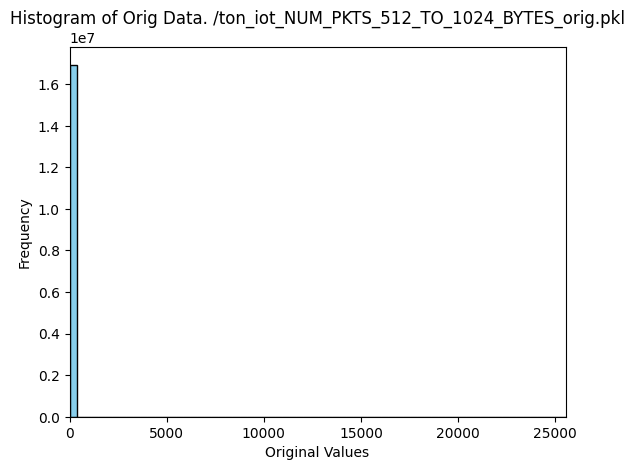

In [ ]:
plot_hist(working_column,0)

In [ ]:
(a_skewness,a_kurtosis) = give_sandk(working_column)
print(col_namer,":",a_skewness,a_kurtosis)

NUM_PKTS_512_TO_1024_BYTES : 645.8641283918085 553376.1623185044


In [ ]:
full_array_shape = working_column.shape
zero_array_shape = len([p  for p in range(working_column.shape[0]) if working_column[p] <= 0])
print(full_array_shape[0],zero_array_shape, full_array_shape[0] - zero_array_shape)

16940496 14268532 2671964


In [ ]:
transformed_data, lambda_value = boxcox(working_column)
print("Lambda value:", lambda_value)
(b_skewness,b_kurtosis) = give_sandk(transformed_data)
print(col_namer,":",b_skewness,b_kurtosis)


ValueError: Data must be positive.

In [ ]:
import numpy as np
def check_xforms(incoming):
  #log
  print('log',give_sandk(np.log(incoming)))
  #sq root
  print('sqroot',give_sandk(np.sqrt(incoming)))
  #cube root
  print('cuberoot',give_sandk(np.cbrt(incoming)))


In [ ]:
check_xforms(working_column)

<ipython-input-10-27a669edf4a1>:4: RuntimeWarning: divide by zero encountered in log
  print('log',give_sandk(np.log(incoming)))
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1070: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - mean


log (nan, nan)
sqroot (60.87706988497253, 11869.422664788328)
cuberoot (4.595747901364787, 102.73962737206854)


In [ ]:
#transformed_data = np.log(working_column)
#transformed_data = np.sqrt(working_column)
transformed_data = np.cbrt(working_column)

In [ ]:
check_xforms(transformed_data)

<ipython-input-10-27a669edf4a1>:4: RuntimeWarning: divide by zero encountered in log
  print('log',give_sandk(np.log(incoming)))


log (nan, nan)
sqroot (2.619930478944066, 5.214600264929203)
cuberoot (2.586307737261233, 4.740291712724578)


0.0 5.720683891268811e+85


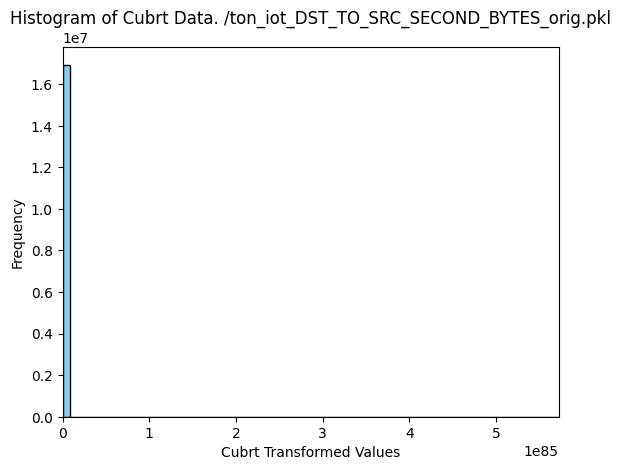

0.0 3.853150598369481e+28


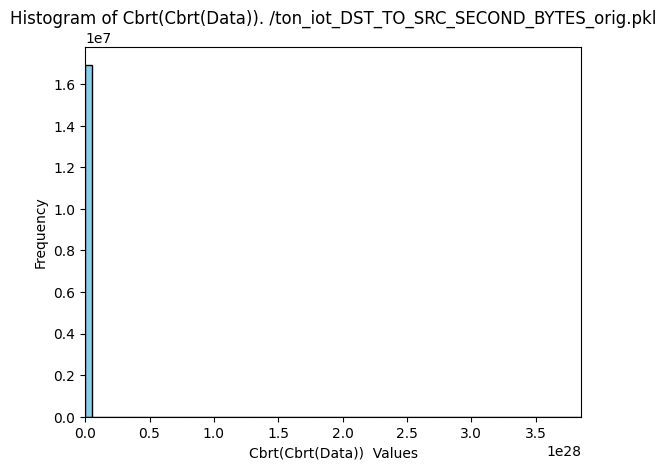

In [ ]:
#log_xformed_data = np.log(working_column)
#plot_hist(log_xformed_data,1)
#sqrt_transformed_data = np.sqrt(working_column)
#plot_hist(sqrt_transformed_data,2)
cbrt_transformed_data = np.cbrt(working_column)
plot_hist(cbrt_transformed_data,3)


#plot_hist(transformed_data,4) # BOX COX
#log_bc_xformed_data = np.log(transformed_data)
#plot_hist(log_bc_xformed_data,5)
#sqrt_bc_transformed_data = np.sqrt(transformed_data)
#plot_hist(sqrt_bc_transformed_data,6)
#cbrt_bc_transformed_data = np.cbrt(transformed_data)
#plot_hist(cbrt_bc_transformed_data,7)

#Cube Root

#log_cbrt_xformed_data = np.log(transformed_data)
#plot_hist(log_bc_xformed_data,8)
#sqrt_cbrt_transformed_data = np.sqrt(transformed_data)
#plot_hist(sqrt_cbrt_transformed_data,9)
cbrt_cbrt_transformed_data = np.cbrt(transformed_data)
plot_hist(cbrt_cbrt_transformed_data,10)
#cbrt_sqrt_transformed_data = np.sqrt(transformed_data)
#plot_hist(cbrt_sqrt_transformed_data,11)




In [ ]:
data = working_column

threshold = 0

partition_1 = data[data <= threshold]
partition_2 = data[data > threshold]


In [ ]:
partition_1.shape,partition_2.shape, partition_1.shape[0]+partition_2.shape[0],working_column.shape

((6713832,), (10226664,), 16940496, (16940496,))

In [ ]:
np.unique(partition_1), partition_1[0]

(array([0]), 0)

In [ ]:
(b_skewness,b_kurtosis) = give_sandk(partition_2)
print(col_namer,":",b_skewness,b_kurtosis)

p2transformed_data, lambda_value = boxcox(partition_2)
print("Lambda value:", lambda_value)
(ab_skewness,ab_kurtosis) = give_sandk(p2transformed_data)
print('box cox modif', col_namer,":",ab_skewness,ab_kurtosis)


DST_TO_SRC_AVG_THROUGHPUT : 84.72611769927757 11942.983624900511
Lambda value: -0.004957212055951191
box cox modif DST_TO_SRC_AVG_THROUGHPUT : -0.0006377948829397946 0.1994833117430166


In [ ]:
check_xforms(partition_2)

log (0.03147668975014955, 0.1865042959807819)
sqroot (3.9770058205079706, 49.224608480020144)
cuberoot (2.014826197548907, 6.9291479379831085)


8000 4294328704


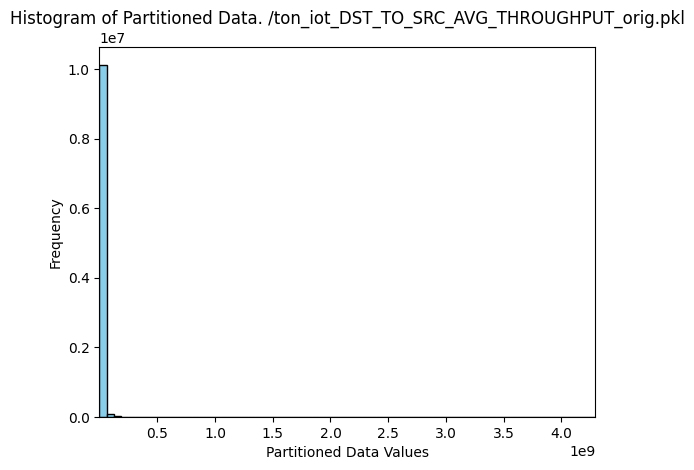

In [ ]:
plot_hist((partition_2),-1)

8.789940729572614 21.004634377280386


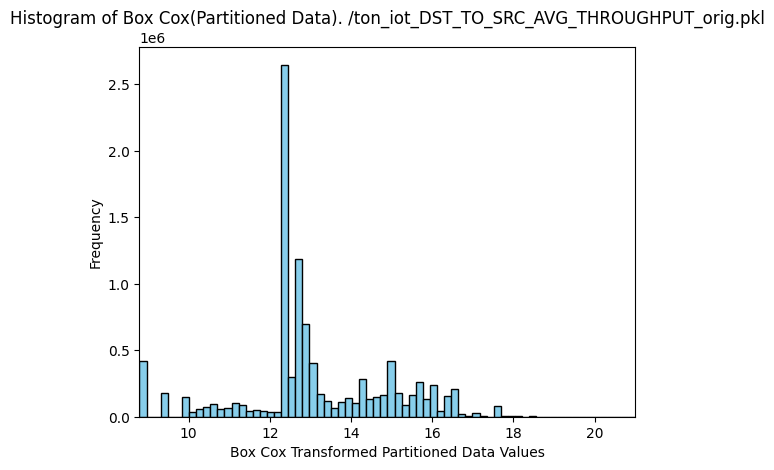

20.0 1625.4181114563291


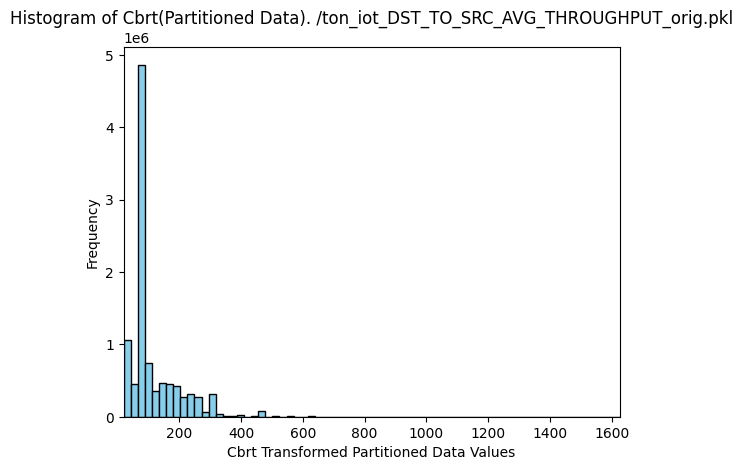

In [ ]:
#p2transformed_data = np.log(partition_2)
#plot_hist((p2transformed_data),-3)
plot_hist((p2transformed_data),-2)  #boxcox
#p2transformed_data = np.sqrt(partition_2)
#plot_hist((p2transformed_data),-4)
p2transformed_data = np.cbrt(partition_2)
plot_hist((p2transformed_data),-6)

In [ ]:
len(np.unique(partition_2)), np.min(partition_2), np.max(partition_2)

(14719, 8000, 4294328704)

In [ ]:
len(np.unique(p2transformed_data)),np.min(p2transformed_data), np.max(p2transformed_data)

(14719, 20.0, 1625.4181114563291)

In [ ]:

values, counts = np.unique(partition_2, return_counts=True)
most_frequent_value = values[np.argmax(counts)]
print(most_frequent_value)

1


In [ ]:
import scipy.stats as statists
lambda_values = np.linspace(-5, 5, 101)  # Generates values between -5 and 5

results = {}

# boxcox Xfor for each λ
for lmbda in lambda_values:
    transformed = boxcox(partition_2, lmbda=lmbda)
    skewness = skew(transformed)
    kurtosis = statists.kurtosis(transformed)
    results[lmbda] = (transformed, skewness, kurtosis)

#skewness and kurtosis for each λ
for lmbda in lambda_values:
    _, skewness, kurtosis = results[lmbda]
    print(f"Lambda={lmbda:.2f}: Skewness={skewness:.4f}, Kurtosis={kurtosis:.4f}")


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1092: RuntimeWarning: overflow encountered in square
  s = s**2
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1094: RuntimeWarning: overflow encountered in multiply
  s *= a_zero_mean
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:118: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1088: RuntimeWarning: overflow encountered in square
  s = a_zero_mean**2
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1070: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - mean


Lambda=-5.00: Skewness=-1.1653, Kurtosis=-0.5311
Lambda=-4.90: Skewness=-1.1621, Kurtosis=-0.5444
Lambda=-4.80: Skewness=-1.1588, Kurtosis=-0.5566
Lambda=-4.70: Skewness=-1.1554, Kurtosis=-0.5679
Lambda=-4.60: Skewness=-1.1517, Kurtosis=-0.5786
Lambda=-4.50: Skewness=-1.1479, Kurtosis=-0.5887
Lambda=-4.40: Skewness=-1.1438, Kurtosis=-0.5984
Lambda=-4.30: Skewness=-1.1396, Kurtosis=-0.6078
Lambda=-4.20: Skewness=-1.1350, Kurtosis=-0.6171
Lambda=-4.10: Skewness=-1.1302, Kurtosis=-0.6263
Lambda=-4.00: Skewness=-1.1250, Kurtosis=-0.6355
Lambda=-3.90: Skewness=-1.1195, Kurtosis=-0.6449
Lambda=-3.80: Skewness=-1.1136, Kurtosis=-0.6545
Lambda=-3.70: Skewness=-1.1072, Kurtosis=-0.6644
Lambda=-3.60: Skewness=-1.1004, Kurtosis=-0.6746
Lambda=-3.50: Skewness=-1.0930, Kurtosis=-0.6854
Lambda=-3.40: Skewness=-1.0850, Kurtosis=-0.6967
Lambda=-3.30: Skewness=-1.0765, Kurtosis=-0.7086
Lambda=-3.20: Skewness=-1.0672, Kurtosis=-0.7213
Lambda=-3.10: Skewness=-1.0571, Kurtosis=-0.7349
Lambda=-3.00: Skewne

In [ ]:

p3transformed_data = statists.boxcox(partition_2, lmbda=-3.6)


0.27777606410228317 0.2777777777777778


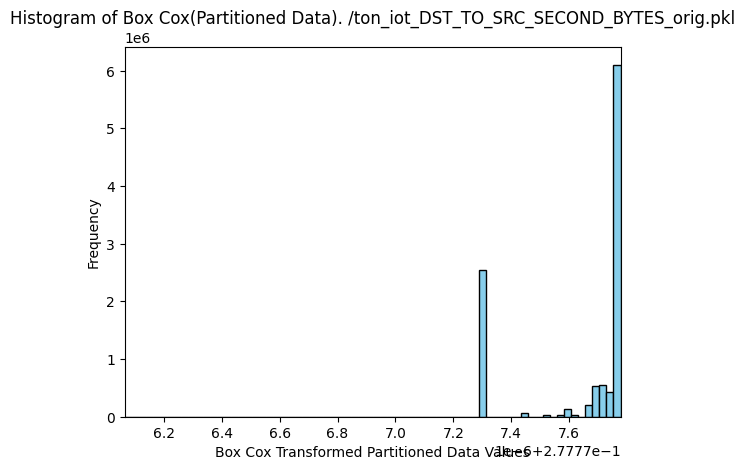

In [ ]:
plot_hist(p3transformed_data,-2)

In [ ]:
 len(np.unique(p3transformed_data)), np.min(p3transformed_data), np.max(p3transformed_data)

(4303, 0.27777606410228317, 0.2777777777777778)

In [ ]:
# Yeo-Johnson transformation (scipy automatically finds the best lambda)
transformed_data, best_lambda = yeojohnson(working_column)
print(f"Best lambda for Yeo-Johnson transformation: {best_lambda}")


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1496: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda


BracketError: The algorithm terminated without finding a valid bracket. Consider trying different initial points.

-0.0 0.7976118869091233


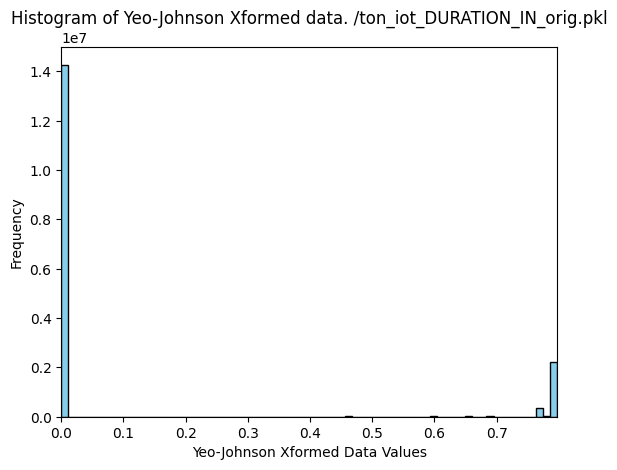

In [ ]:
plot_hist(transformed_data,-5)

In [ ]:
statists.skew(p3transformed_data),statists.kurtosis(p3transformed_data)

(-1.1003530549277012, -0.6746318487745548)

In [ ]:
give_sandk(p3transformed_data)

TypeError: 'numpy.float64' object is not callable

In [ ]:
check_xforms(transformed_data)

<ipython-input-11-27a669edf4a1>:4: RuntimeWarning: divide by zero encountered in log
  print('log',give_sandk(np.log(incoming)))
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1070: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - mean


log (nan, nan)
sqroot (1.6257831335717214, 0.6431707974063263)
cuberoot (1.6257831335717063, 0.6431707974062597)


In [ ]:
len(np.unique(transformed_data)), np.min(transformed_data), np.max(transformed_data), np.mean(transformed_data), np.std(transformed_data)

(1799, -0.0, 2.8836793357652435, 0.5323622945640956, 1.118817405354923)

In [ ]:
def rank_xformation_mandsd(incoming):

  ranked_data = (np.argsort(incoming))
  mean_rank = np.mean(ranked_data)
  std_dev_rank = np.std(ranked_data)

  return (mean_rank,std_dev_rank)

#z_scores = (ranked_data - mean_rank) / std_dev_rank


In [ ]:
def rank_xformation_mandsd2(incoming):
  ranked_data = np.argsort(np.argsort(incoming))


  N = len(incoming)

  mean_rank = (N - 1) / 2  # Mean rank for continuous data
  std_dev_rank = np.sqrt((N**2 - 1) / 12)  # Standard deviation of rank for continuous data
  z_scores = (ranked_data - mean_rank) / std_dev_rank
  print(mean_rank,std_dev_rank,z_scores.shape,z_scores[0:100])




In [ ]:
#(amean,asd)= rank_xformation_mandsd2(working_column)
rank_xformation_mandsd2(working_column)
#print(working_column[0:100])
#print(col_namer,": ", amean,asd)

8470247.5 4890299.962902881 (16940496,) [1.71437776 1.6894662  0.67131945 0.67131925 0.67182126 0.67193639
 0.67160737 0.67175317 0.67168078 0.67071295 0.67074219 0.67070661
 0.67068371 0.67076182 0.67050335 0.6706197  0.67064444 0.67089146
 0.67092807 0.67091907 0.67087531 0.67287253 0.67290668 0.67288868
 0.67270914 0.6728394  0.67284083 0.67308254 0.67317762 0.67317742
 0.67218811 0.6721875  0.67214967 0.66834111 0.6683407  0.66866522
 0.66776487 0.66776977 0.66783746 0.66762479 0.66811372 0.66809552
 0.66813376 0.66793868 0.66800841 0.668008   0.66980625 0.6697492
 0.66977988 0.66990052 0.66988007 0.67021952 0.66918093 0.66917521
 0.66910855 0.67764913 0.67780904 0.67668047 0.6766316  0.67667045
 0.67644102 0.67638376 0.67638356 0.67883474 0.67886684 0.67886664
 0.67858138 0.67870837 0.67916212 0.67916192 0.67917132 0.67917112
 0.67917051 0.67927091 0.6792707  0.67899935 0.67803581 0.67803561
 0.6780354  0.6780352  0.67803356 0.67803315 0.67803295 0.67803274
 0.67803172 0.67815584 

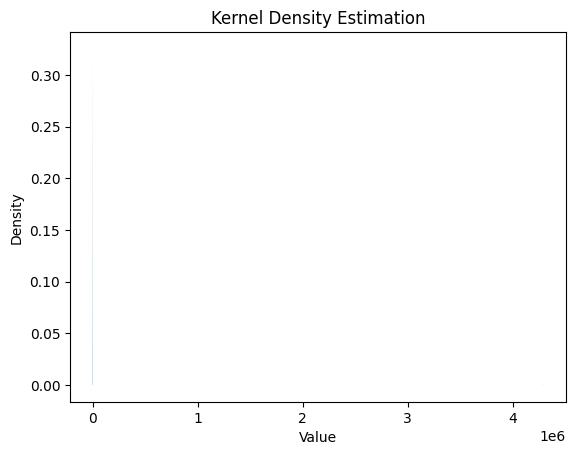

In [ ]:
import numpy as np
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt

# Assuming your data is stored in a NumPy array called 'data'
data = working_column

# Reshape the data if it's in a single column format
data = data.reshape(-1, 1)

# Fit the kernel density estimation
kde = KernelDensity(kernel='gaussian').fit(data)

# Generate points for the density estimation curve
x = np.linspace(min(data), max(data), 1000).reshape(-1, 1)

# Calculate the density estimates for these points
log_dens = kde.score_samples(x)

# Plot the results
plt.fill_between(x[:, 0], np.exp(log_dens), alpha=0.5)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Kernel Density Estimation')
plt.show()


In [ ]:
'''import os
import pandas as pd
from scipy.stats import moment, normaltest
directory = '/content/gdrive/MyDrive/NF_ToN_IoT_v2_full170chunks'


def incremental_moments(data, current_moments, count):
    # incremental computation of mean, variance, skewness, and kurtosis
    delta = data - current_moments[0]
    delta_n = delta / (count + 1)
    delta_n2 = delta_n ** 2
    term1 = delta * delta_n * count
    current_moments[3] += term1 * delta_n2 * (count ** 2 - 3 * count + 3) + 6 * delta_n2 * current_moments[1] - 4 * delta_n * current_moments[2]
    current_moments[2] += term1
    current_moments[1] += delta_n * count
    current_moments[0] += delta_n
    return current_moments

def query_gaussian_dist(directory,p):
    column_stats = {}
    alpha = 0.05
    non_gaussian_columns = []

    # initializing moments for each column
    moments = {}

    for filename in os.listdir(directory):
        if filename.endswith(".parquet"):
            filepath = os.path.join(directory, filename)
            file_chunks = pd.read_parquet(filepath, engine='pyarrow')
            excluded_columns = list(range(4)) + [21, 22] + list(range(len(file_chunks.columns)-2, len(file_chunks.columns)))
            file_chunks = file_chunks.drop(file_chunks.columns[excluded_columns], axis=1)
            #print(type(file_chunks))
            file_chunks =  pd.DataFrame(  file_chunks.iloc[:,p])
            #print(type(file_chunks))

            for column in file_chunks.columns:
                data = file_chunks[column].dropna()
                count = len(data)
                # initializing moments if not already done
                if column not in moments:
                    moments[column] = [0.0, 0.0, 0.0, 0.0]  # mean, variance, skewness, kurtosis
                # update moments incrementally
                moments[column] = incremental_moments(data, moments[column], count)

    # computing skewness and kurtosis for each column
    for column, m in moments.items():
        mean, variance, skewness, kurtosis = m[0], m[1], m[2], m[3]
        skewness = skewness / ((variance ** 1.5) * count)
        kurtosis = kurtosis / (variance ** 2) - 3
        _, p_value = normaltest(data)
        if p_value < alpha:
            non_gaussian_columns.append(column)

        column_stats[column] = (skewness, kurtosis)

    print(p,column_stats)
    return column_stats, non_gaussian_columns







for z in range(1):
  column_stats, non_gaussian_columns = query_gaussian_dist(directory,z)
print("Column Statistics:")
for column, stats in column_stats.items():
    print(f"Column: {column}, Skewness: {stats[0]}, Kurtosis: {stats[1]}")

print("\nNon-Gaussian Columns:")
print(non_gaussian_columns)
'''

'import os\nimport pandas as pd\nfrom scipy.stats import moment, normaltest\ndirectory = \'/content/gdrive/MyDrive/NF_ToN_IoT_v2_full170chunks\'\n\n\ndef incremental_moments(data, current_moments, count):\n    # incremental computation of mean, variance, skewness, and kurtosis\n    delta = data - current_moments[0]\n    delta_n = delta / (count + 1)\n    delta_n2 = delta_n ** 2\n    term1 = delta * delta_n * count\n    current_moments[3] += term1 * delta_n2 * (count ** 2 - 3 * count + 3) + 6 * delta_n2 * current_moments[1] - 4 * delta_n * current_moments[2]\n    current_moments[2] += term1\n    current_moments[1] += delta_n * count\n    current_moments[0] += delta_n\n    return current_moments\n\ndef query_gaussian_dist(directory,p):\n    column_stats = {}\n    alpha = 0.05\n    non_gaussian_columns = []\n\n    # initializing moments for each column\n    moments = {}\n\n    for filename in os.listdir(directory):\n        if filename.endswith(".parquet"):\n            filepath = os.path